# 📒 Credit Card Fraud Detection
A polished end-to-end notebook: data load, preprocessing, training, interpretation, and export.

## 1. Setup & Data Load

In [1]:
import os
import shutil
import pandas as pd

In [2]:
# Move kaggle credential into place (if using Kaggle API)
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [3]:
# Read train/test CSVs
base_path = "/home/codespace/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1"
df_train = pd.read_csv(f"{base_path}/fraudTrain.csv")
df_test  = pd.read_csv(f"{base_path}/fraudTest.csv")

In [47]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode categorical features
le_category = LabelEncoder()
le_category.fit(df_train["category"].astype(str))

# save for deployment
joblib.dump(le_category, "streamlit_app/le_category.joblib")

['streamlit_app/le_category.joblib']

In [4]:
print("Train shape:", df_train.shape)
print("Test shape:",  df_test.shape)

Train shape: (1296675, 23)
Test shape: (555719, 23)


In [5]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Preprocessing & Feature Engineering

In [7]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
# Import polished process function
import sys
sys.path.append('scripts')  # adds scripts folder to path

import importlib
import process_final

importlib.reload(process_final)
from process_final import polprocess


In [31]:
# 2.2 Compute category→fraud rate mapping
cat_rates = df_train.groupby('category')['is_fraud'].mean()

In [ ]:
# 2.3 Apply to train/test
train_prep = polprocess(df_train, cat_rates)
test_prep  = polprocess(df_test,  cat_rates)

In [33]:
# 2.4 Split into X/y
X_train = train_prep.drop(columns=['is_fraud'])
y_train = train_prep['is_fraud']
X_test  = test_prep.drop(columns=['is_fraud'])
y_test  = test_prep['is_fraud']

In [34]:
print("Example engineered row:")
X_train.head(1).T

Example engineered row:


,0
merchant,514.000000
category,8.000000
amt,4.970000
gender,0.000000
city,526.000000
state,27.000000
lat,36.078800
long,-81.178100
city_pop,3495.000000
job,370.000000


## 3. Hyperparameter Tuning & Final Training

In [35]:
from xgboost import train, DMatrix
from sklearn.metrics import confusion_matrix, classification_report


Best Parameters from prior search:
```python
{'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 12, 'subsample': 1.0}




In [36]:
params = {
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'n_estimators':350,
    'max_depth':12,
    'learning_rate':0.15,
    'subsample':1.0,
    'colsample_bytree':0.6,
    'scale_pos_weight': float((y_train==0).sum()/(y_train==1).sum()),
    'base_score':float(y_train.mean())
}

In [37]:
# 3.2 Prepare DMatrices
features = [
    'amt_log','category_te','hour_sin','hour_cos','is_night',
    'city_pop_log','pop_size_code','amt_x_catTE','amt_x_hour_sin'
]
dtr = DMatrix(X_train[features], label=y_train)
dvl = DMatrix(X_test[features],  label=y_test)

In [38]:
# 3.3 Train with early stopping
bst = train(
    params, dtr, num_boost_round=500,
    evals=[(dtr,'train'),(dvl,'eval')],
    early_stopping_rounds=10, verbose_eval=False
)

[12:07:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimators" } are not used.



In [39]:
# 3.4 Evaluate
preds = (bst.predict(DMatrix(X_test[features])) >= 0.70).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds, digits=4))

Confusion Matrix:
[[516341  37233]
 [   263   1882]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9327    0.9650    553574
           1     0.0481    0.8774    0.0912      2145

    accuracy                         0.9325    555719
   macro avg     0.5238    0.9051    0.5281    555719
weighted avg     0.9958    0.9325    0.9616    555719



## 4. Model Interpretation (SHAP)

In [40]:
import shap

In [41]:
# 4.1 Load explainer & SHAP values
# take a small random sample so we don’t exhaust RAM/CPU
X_shap = X_test[features].sample(250000, random_state=42)

# use TreeExplainer on the trained Booster
explainer = shap.TreeExplainer(bst, feature_perturbation='interventional')
shap_values = explainer.shap_values(X_shap, check_additivity=False,)

# confirm there really are no NaNs left
print("Any NaNs in SHAP? ", np.isnan(shap_values).any())


Any NaNs in SHAP?  False


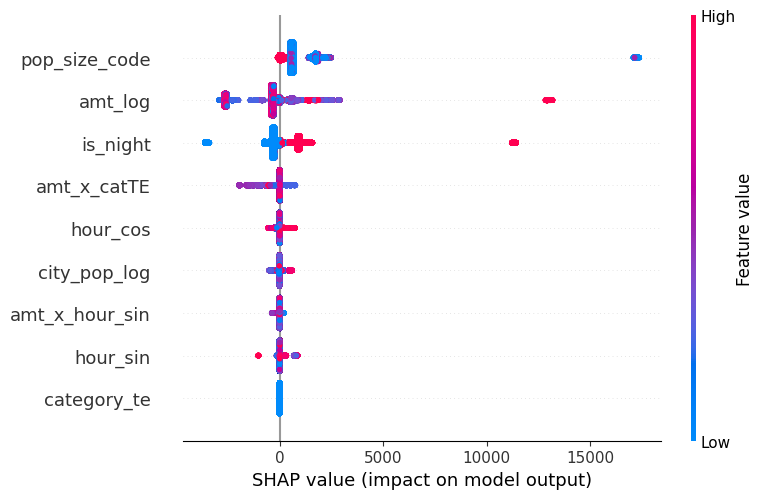

In [42]:
shap.summary_plot(shap_values, X_shap)

## 5. Deploy & Export Artifacts

In [45]:
import joblib
import xgboost as xgb

In [48]:
# Userfriendly names for the categories:
uf_names = {
    "misc_net":        "Miscellaneous (Online)",
    "grocery_pos":     "Grocery (In-Store)",
    "entertainment":   "Entertainment",
    "gas_transport":   "Gas & Transport",
    "misc_pos":        "Miscellaneous (Point-of-Sale)",
    "grocery_net":     "Grocery (Online)",
    "shopping_net":    "Shopping (Online)",
    "shopping_pos":    "Shopping (In-Store)",
    "food_dining":     "Food & Dining",
    "personal_care":   "Personal Care",
    "health_fitness":  "Health & Fitness",
    "travel":          "Travel",
    "kids_pets":       "Kids & Pets",
    "home":            "Home"
}

In [49]:
# 5.1 Save Booster
bst.save_model("streamlit_app/fraud_slim.json")
# 5.2 Save feature list & mappings
joblib.dump(features,    "streamlit_app/slim_features.joblib")
joblib.dump(cat_rates,   "streamlit_app/category_rates.joblib")
#joblib.dump(le_category,"streamlit_app/le_category.joblib") # already saved above
joblib.dump(uf_names,    "streamlit_app/uf_names.joblib")

['streamlit_app/uf_names.joblib']

In [50]:
# 5.3 Snippet: wiring into Streamlit
print("# In your app.py:\n" + \
      "# booster = xgb.Booster(); booster.load_model('fraud_slim.json')\n" + \
      "# features = joblib.load('slim_features.joblib')\n" + \
      "# … build df = pd.DataFrame([...])[features]\n" + \
      "# prob = booster.predict(xgb.DMatrix(df))[0]\n" + \
      "# st.metric('Fraud Probability', f'{prob:.1%}')")

# In your app.py:
# booster = xgb.Booster(); booster.load_model('fraud_slim.json')
# features = joblib.load('slim_features.joblib')
# … build df = pd.DataFrame([...])[features]
# prob = booster.predict(xgb.DMatrix(df))[0]
# st.metric('Fraud Probability', f'{prob:.1%}')
